差分隐私的性质

串行组合性
并行组合性
后处理性

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')

串行组合性 - Sequential Composition

当在单个数据集上独立执行多次数据分析时，串行组合性同样能起到重要的作用。每个个体可以利用此特性度量出参与所有这些数据分析任务时所产生的总隐私消耗量。由串行组合性得到的隐私消耗量是一个上界。给定两个满足差分隐私的数据发布过程，其实际隐私消耗量可能比串行组合性给出的隐私消耗量小，但不可能大于此隐私消耗量。

In [2]:
epsilon1 = 1
epsilon2 = 1
epsilon_total = 2

# 满足1-差分隐私
def F1():
    return np.random.laplace(loc=0, scale=1/epsilon1)

# 满足1-差分隐私
def F2():
    return np.random.laplace(loc=0, scale=1/epsilon2)

# 满足2-差分隐私
def F3():
    return np.random.laplace(loc=0, scale=1/epsilon_total)

# 根据串行组合性，满足2-差分隐私
def F_combined():
    return (F1() + F2()) / 2

绘制F1和F2的输出概率分布图。可以看出，这两个输出概率分布看起来非常相似。

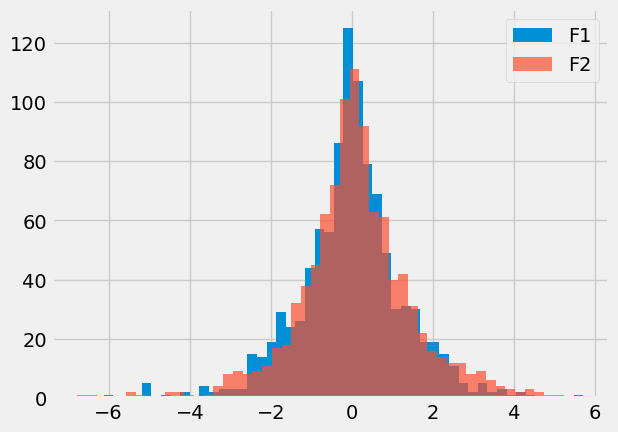

In [3]:
# 绘制F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1');

# 绘制F2（看起来应该与F1相同）
plt.hist([F2() for i in range(1000)], bins=50, alpha=.7, label='F2');
plt.legend();

绘制出F1和F3的输出概率分布图。可以看出，F3的输出概率分布看起来比F1的更"尖"，这是因为
取值越大意味着隐私保护程度越低，因此输出结果远离真实结果的可能性也就越小。

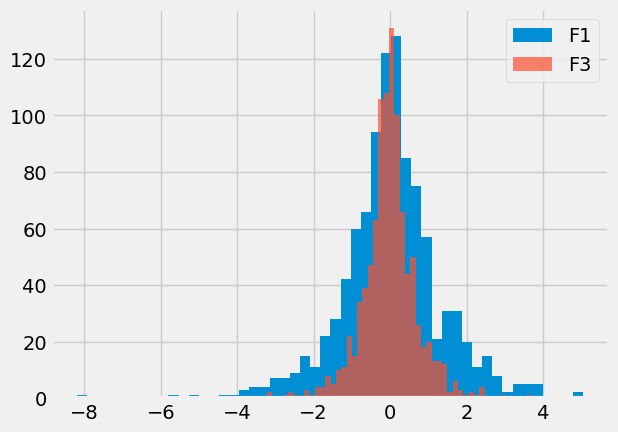

In [4]:
# 绘制F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1');

# 绘制F3（看起来应该比F1更"尖"）
plt.hist([F3() for i in range(1000)], bins=50, alpha=.7, label='F3');
plt.legend();

再绘制出F和F_combined的输出概率分布图。可以看出，F_combined的输出概率分布图更尖。这意味着F_combined的输出结果比F1的输出结果更准确，对应的
取值一定更大（即F_combined的隐私保护程度比F1更低）。

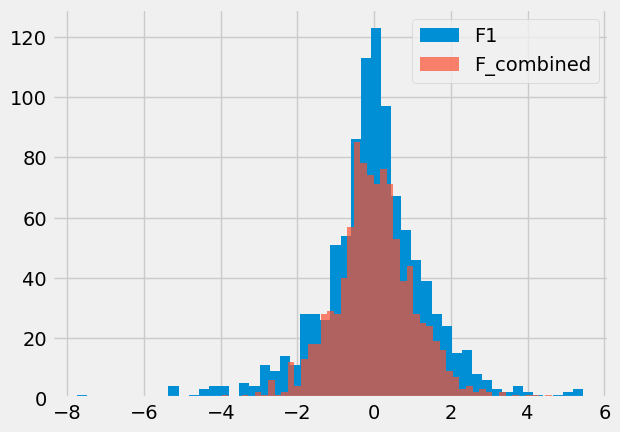

In [5]:
# 绘制F1
plt.hist([F1() for i in range(1000)], bins=50, label='F1');

# 绘制F_combined（看起来应该比F1更"尖"）
plt.hist([F_combined() for i in range(1000)], bins=50, alpha=.7, label='F_combined');
plt.legend();

那F3和F_combined呢？回想一下，这两种机制的取值相等，都等于2。他们的输出概率分布看起来应该也相同才对。

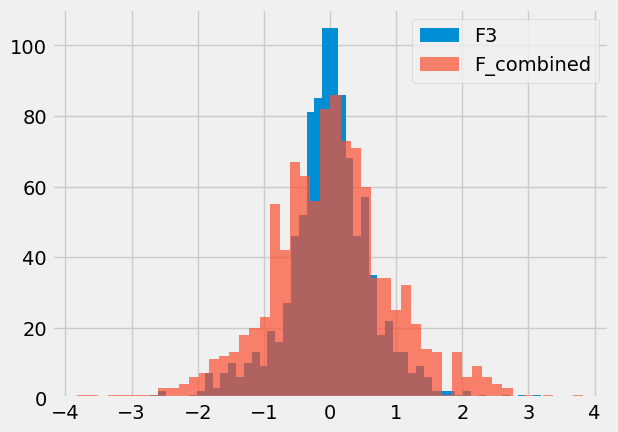

In [6]:
# 绘制F3
plt.hist([F3() for i in range(1000)], bins=50, label='F3');

# 绘制F_combined（看起来应该与F3相同）
plt.hist([F_combined() for i in range(1000)], bins=50, alpha=.7, label='F_combined');
plt.legend();

并行组合性 - Parallel Composition

并行组合性是计算多次数据发布总隐私消耗量的第二种方法，可以看成是串行组合性的替代方法。并行组合性的基本思想是：将数据集拆分为互不相交的子数据块，在子数据块上分别应用相应的差分隐私机制。由于子数据块互不相交，每个个体的数据"仅可能"出现在一个子数据块中。因此，即使把数据集划分为k个子数据块，并在k个子数据块上分别应用相同的差分隐私机制（这意味着我们在数据集上应用了k次差分隐私机制），我们再每个个体数据上仅使用了一次差分隐私机制。

直方图 - Histogram

In [7]:
adult = pd.read_csv("adult_with_pii.csv")
adult['Education'].value_counts().to_frame().head(5)

,count
Education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382


In [8]:
epsilon = 1

# 虽然我们发布了多个结果，但此次数据分析的总隐私消耗量为ε = 1
f = lambda x: x + np.random.laplace(loc=0, scale=1/epsilon)
s = adult['Education'].value_counts().apply(f)
s.to_frame().head(5)

,count
Education,
HS-grad,10501.707652
Some-college,7289.441346
Bachelors,5355.228532
Masters,1723.319549
Assoc-voc,1379.097757


列联表 - Contingency Tabl

In [9]:
pd.crosstab(adult['Education'], adult['Sex']).head(5)

Sex,Female,Male
Education,,
10th,295,638
11th,432,743
12th,144,289
1st-4th,46,122
5th-6th,84,249


In [10]:
ct = pd.crosstab(adult['Education'], adult['Sex'])
f = lambda x: x + np.random.laplace(loc=0, scale=1/epsilon)
ct.applymap(f).head(5)

C:\Users\25960\AppData\Local\Temp\ipykernel_49220\797734013.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ct.applymap(f).head(5)


Sex,Female,Male
Education,,
10th,294.561706,641.808106
11th,433.640558,743.014044
12th,144.976071,288.306111
1st-4th,45.524677,122.200600
5th-6th,83.609568,249.279148


后处理性 - Post-processing

后处理性意味着在差分隐私机制的输出结果上执行任意计算也总是安全的。任意计算均不会降低差分隐私机制所提供的隐私保护程度。特别地，我们甚至可以对计算结果进行后处理，以降低噪声量、改善输出结果（例如，对于不应该返回负数的问询，将负数回复结果替换为零）。事实上，许多复杂的差分隐私算法都会利用后处理性来降低噪声，提高输出结果的准确性。
后处理性的另一个含义是，差分隐私可以抵抗基于辅助信息的隐私攻击方法。例如，g数
可能包含关于数据集元素的辅助g息，
期望利用该信息实施关联攻击。后处理性告诉我g，无论
中包含何种辅助信息，此攻击的效果都会epsilon隐私参数
所约束。